In questo file (temperaturesByCity.ipynb):

Prelevando i dati dal file GlobalLandTemperaturesByCity.csv
Costruire funzioni per:
• Calcolare quante nazioni sono rappresentate -> "countCountries(dataset_city)"
• Quante città italiane -> "countItalianCities(dataset_city)"
• Graficare con un grafico a linee la temperatura di una città italiana per un determinato mese negli anni -> "lineGraphCity(dataset_city)"
• Calcolare la retta di regressione -> "utilities.regressionLine(years, avgTemperatures, title)"

In [1]:
import calendar
from random import random, choice

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utilities


In [2]:
datasetPath2 = './GlobalLandTemperaturesByCity.csv'
dataset_city = pd.read_csv(datasetPath2)
dataset_globalTemperaturesByCities = pd.DataFrame(dataset_city, columns=['dt', 'AverageTemperature',
                                                            'AverageTemperatureUncertainty',
                                                            'City', 'Country',
                                                            'Latitude',
                                                            'Longitude'])

In [3]:
def countCountries(dataset_city):
    """
    Funzione calcolare quante nazioni sono rappresentate nel dataset GlobalLandTemperaturesByCity.csv
    :param dataset_city: dataset
    """

    countries = dataset_city['Country']
    #print("num paesi totali: ", len(countries))

    unique = set(countries)
    numCountries = len(unique)
 
    return numCountries

In [4]:
#calcola quante nazioni sono rappresentate
numCountries = countCountries(dataset_city)
print("Numero di nazioni rappresentate : ", numCountries)

Numero di nazioni rappresentate :  159


In [5]:
def countItalianCities(dataset_city):
    """
    Funzione calcolare quante citta italiane sono rappresentate nel dataset GlobalLandTemperaturesByCity.csv
    :param dataset_city: dataset
    :return numItaCities: numero di citta italiane
    :return italianCities: lista delle citta italiane
    """

    index = 0
    italianCities = []

    for country in dataset_city['Country']:
        if country == 'Italy':
            italianCities.append((dataset_city['City'][index]))
        index = index+1

    numItaCities = len(set(italianCities))

    return numItaCities, italianCities

In [6]:
# calcola quante città italiane sono rappresentate
numItaCities, italianCities = countItalianCities(dataset_city)
print("Numero di città italiane rappresentate : ", numItaCities)

Numero di città italiane rappresentate :  42


In [10]:

def lineGraphCity(dataset_city):
    """
    Funzione per graficare la temperatura di una città italiana scelta randomicamente 
    per il mese 'month' durante gli anni  
    :param dataset_city: dataset
    :return years: lista anni
    :return avgTemperatures: lista temperature medie
    """
    
    city = utilities.chooseRandom(italianCities, "city")
    month = utilities.chooseMonth()

    print("Mese selezionato: ", calendar.month_name[month])

    #rimozione NaN
    dataset_city.dropna(inplace=True)

      
    print("\nGrafico a linee della temperatura di "+city+" (città italiana scelta randomicamente tra quelle presenti nel dataset)"
           "per il mese "+calendar.month_name[month])

    #indici nel dataset della città italiana specificata
    index = dataset_city.index[dataset_city['City'] == city].tolist()
    #print("--> index: ", index, "len index: ", len(index))

    avgTemperatures = []
    years = []

    # Recupero le temperature per ogni anno per il mese selezionato
    for i in index:
        date = dataset_city['dt'][i]
        parsedMonth = int(date[5:-3])
        if parsedMonth == month:
            years.append(np.float64(date[:-6]))
            avgTemperatures.append(dataset_city['AverageTemperature'][i])

    #grafico
    fig = plt.figure()
    #plt.errorbar(years, avgTemperatures, label='avgTemperatures', elinewidth=10)
    plt.plot(years, avgTemperatures)
    plt.title("Average Temperature in "+ city + " in the month of " + calendar.month_name[month])
    plt.xlabel("Years")
    plt.ylabel("Temperature")
    plt.show()

    return years, avgTemperatures, city, month
    



Inserire numero mese per visualizzare grafico:
 - Gennaio: 1
 - Febbraio: 2
 - Marzo: 3
 - Aprile: 4
 - Maggio: 5
 - Giugno: 6
 - Luglio: 7
 - Agosto: 8
 - Settembre: 9
 - Ottobre: 10
 - Novembre: 11
 - Dicembre: 12

Inserire un numero tra quelli elencati:


 11


Mese selezionato:  November

Grafico a linee della temperatura di Florence (città italiana scelta randomicamente tra quelle presenti nel dataset)per il mese November


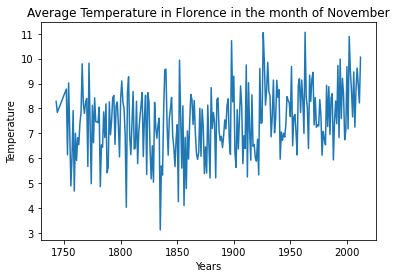

In [11]:
#Grafico della temperatura di una città italiana in un determinato mese negli anni
years, avgTemperatures, city, month = lineGraphCity(dataset_city)



m:  0.0046373910076558545 b: -1.2224384797956935


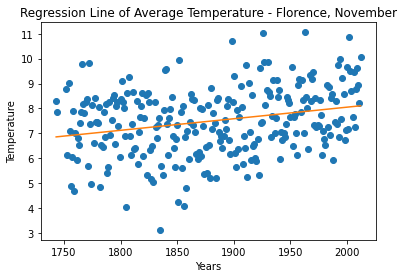

In [12]:
#Retta di regressione
title = "Regression Line of Average Temperature - " + city + ", " + calendar.month_name[month]

utilities.regressionLine(years, avgTemperatures, title)